# Getting to learn FastF1 by Analyzing the 2022 Brazilian Grand Prix

In [27]:
import pandas as pd
import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt
from timple.timedelta import strftimedelta

In [13]:
fastf1.Cache.enable_cache('cache')

In [14]:
session = fastf1.get_session(2022, 'Brazil', 'SQ') #using the sprint quali session for testing
session.event

RoundNumber                                                         21
Country                                                         Brazil
Location                                                     São Paulo
OfficialEventName    FORMULA 1 HEINEKEN GRANDE PRÊMIO DE SÃO PAULO ...
EventDate                                          2022-11-13 17:00:00
EventName                                         São Paulo Grand Prix
EventFormat                                                     sprint
Session1                                                    Practice 1
Session1Date                                       2022-11-11 12:30:00
Session2                                                    Qualifying
Session2Date                                       2022-11-11 16:00:00
Session3                                                    Practice 2
Session3Date                                       2022-11-12 12:30:00
Session4                                                        Sprint
Sessio

With the event loaded, I'm going to get the quali times for the sprint, and then plot them

In [15]:
session.load()

core           INFO 	Loading data for São Paulo Grand Prix - Sprint [v2.3.0]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetching track

In [17]:
drivers = pd.unique(session.laps['Driver'])
print(drivers)

['RUS' 'SAI' 'HAM' 'VER' 'PER' 'LEC' 'NOR' 'MAG' 'VET' 'GAS' 'RIC' 'MSC'
 'ZHO' 'BOT' 'TSU' 'STR' 'OCO' 'ALO' 'LAT' 'ALB']


In [20]:
from fastf1.core import Laps

fastest_laps_list = []
for driver in drivers:
    fastest_lap = session.laps.pick_driver(driver).pick_fastest()
    fastest_laps_list.append(fastest_lap)

fastest_laps = Laps(fastest_laps_list).sort_values(by='LapTime').reset_index(drop=True)

In [25]:
pole = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole['LapTime']
fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']]

,Driver,LapTime,LapTimeDelta
0,RUS,0 days 00:01:14.233000,0 days 00:00:00
1,HAM,0 days 00:01:14.317000,0 days 00:00:00.084000
2,VER,0 days 00:01:14.507000,0 days 00:00:00.274000
3,SAI,0 days 00:01:14.522000,0 days 00:00:00.289000
4,PER,0 days 00:01:14.699000,0 days 00:00:00.466000
5,ALO,0 days 00:01:14.764000,0 days 00:00:00.531000
6,MAG,0 days 00:01:15.110000,0 days 00:00:00.877000
7,LEC,0 days 00:01:15.236000,0 days 00:00:01.003000
8,GAS,0 days 00:01:15.290000,0 days 00:00:01.057000
9,NOR,0 days 00:01:15.380000,0 days 00:00:01.147000


In [24]:
#creating plot color scheme by grabbing team colors
team_colors = []
for index, lap in fastest_laps.iterlaps():
    color = plotting.team_color(lap['Team'])
    team_colors.append(color)

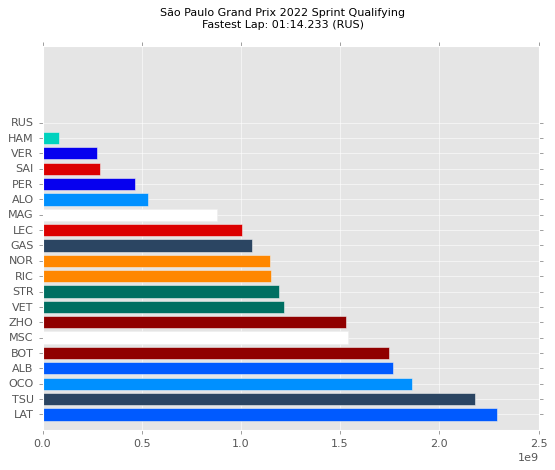

In [31]:
#plotting the data
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors)
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

#show fastest at top
ax.invert_yaxis()

#formatting the plot
lap_time_string = strftimedelta(pole['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{session.event['EventName']} {session.event.year} Sprint Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole['Driver']})")

plt.style.use('fivethirtyeight')

plt.show()
